In [59]:
!pip install shapely
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import FileLink

In [60]:
stores = pd.read_csv('../data/stores.csv')

#### Stores has 1056 rows, 16 cols
NOTE: Store_zip is 9 digits without a hyphen - need to see how that is read by Tableau or in Geospatial for mapping
NOTE: + or - in Mall_grade
NOTE: DIV_ORG_NAME has some differences, so original divisions may have been merged into DIV 8
NOTE: Store name has # in it, letters and numbers

In [61]:
stores

,DIV,STORE,DIV_ORG,DIV_ORG_NAME,REGION,DISTRICT,STORE_NAME,STORE_CITY,STORE_STATE_ALPHA,STORE_ZIP,GROSS_FEET,MALL_GRADE,LOCATION_GRADE,MALL_NAME,LATITUDE,LONGITUDE
0,8,11,1,JYUG,8,15,UNDERGROUND #11 15,PENSACOLA,FL,325048753,1740.0,B+,B,CORDOVA MALL,30.4873,-87.1922
1,8,12,1,JYUG,9,29,UNDERGROUND #12 29,STERLING HEIGHTS,MI,483131320,1600.0,D,A,LAKESIDE MALL,42.6019,-82.9980
2,8,13,1,JYUG,2,7,UNDERGROUND #13 07,LOUISVILLE,KY,402073342,1616.0,B+,B,MALL ST. MATTHEWS,38.2557,-85.6472
3,8,17,1,JYUG,3,73,UNDERGROUND #17 73,MIAMI,FL,331891221,1552.0,B,A,SOUTHLAND MALL,25.5744,-80.3471
4,8,23,1,JYUG,11,13,UNDERGROUND #23 13,MOBILE,AL,366066693,1998.0,B,B,COLONIAL MALL,30.6732,-88.1041
5,8,24,1,JYUG,9,47,UNDERGROUND #24 47,NORTH RIVERSIDE,IL,605461461,1918.0,C,B,NORTH RIVERSIDE PARK MALL,41.8368,-87.8204
6,8,26,1,JYUG,3,64,UNDERGROUND #26 64,JACKSONVILLE,FL,322560770,1749.0,B,B,THE AVENUES MALL,30.2154,-81.5470
7,8,36,1,JYUG,8,58,UNDERGROUND #36 58,MORROW,GA,302602324,1636.0,C-,A,SOUTHLAKE MALL,33.5839,-84.3295
8,8,37,1,JYUG,3,73,UNDERGROUND #37 73,CORAL SPRINGS,FL,330716945,1757.0,B,A,CORAL SQUARE MALL,26.2443,-80.2625
9,8,39,1,JYUG,8,67,UNDERGROUND #39 67,GREENSBORO,NC,274074739,2425.0,B,B,FOUR SEASONS MALL,36.0374,-79.8683


In [62]:
stores.shape[1]

16

In [63]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DIV                1055 non-null   int64  
 1   STORE              1055 non-null   int64  
 2   DIV_ORG            1055 non-null   int64  
 3   DIV_ORG_NAME       1055 non-null   object 
 4   REGION             1055 non-null   int64  
 5   DISTRICT           1055 non-null   int64  
 6   STORE_NAME         1055 non-null   object 
 7   STORE_CITY         1055 non-null   object 
 8   STORE_STATE_ALPHA  1055 non-null   object 
 9   STORE_ZIP          1055 non-null   int64  
 10  GROSS_FEET         1054 non-null   float64
 11  MALL_GRADE         1054 non-null   object 
 12  LOCATION_GRADE     1054 non-null   object 
 13  MALL_NAME          1054 non-null   object 
 14  LATITUDE           1055 non-null   float64
 15  LONGITUDE          1055 non-null   float64
dtypes: float64(3), int64(6),

In [64]:
stores.describe()

,DIV,STORE,DIV_ORG,REGION,DISTRICT,STORE_ZIP,GROSS_FEET,LATITUDE,LONGITUDE
count,1055.0,1055.000000,1055.000000,1055.000000,1055.000000,1.055000e+03,1054.000000,1055.000000,1055.000000
mean,8.0,1976.908057,6.945972,5.876777,34.361137,2.884804e+08,2012.012334,36.305498,-90.793230
std,0.0,2265.508771,1.950994,4.359550,20.672457,3.314085e+08,604.696776,5.983984,15.516462
min,8.0,11.000000,1.000000,1.000000,1.000000,6.030000e+02,0.000000,17.983200,-157.934100
25%,8.0,762.500000,5.000000,3.000000,17.000000,5.318750e+04,1537.750000,32.682800,-97.428600
50%,8.0,1162.000000,8.000000,5.000000,33.000000,1.656506e+08,1966.500000,36.760200,-86.663500
75%,8.0,1656.500000,8.000000,9.000000,50.000000,5.511113e+08,2378.250000,40.742150,-80.232900
max,8.0,7217.000000,15.000000,96.000000,96.000000,9.950124e+08,7200.000000,64.834000,-65.655200


NOTE: Only Division 8 

In [65]:
#create regions count dataframe and reset index
reg_store_counts = stores['REGION'].value_counts().to_frame().reset_index()
#rename columns
reg_store_counts.rename(columns={'index': 'region', 'REGION': 'store_count'}, inplace=True)
#sort by district
reg_store_counts.sort_values(by = 'region', inplace=True)

reg_store_counts

,region,store_count
1,1,117
0,2,131
4,3,103
6,4,98
3,5,106
9,7,94
2,8,111
8,9,94
7,10,98
5,11,102


In [66]:
reg_store_counts.to_csv('reg_store_counts.csv', index=False)
FileLink('reg_store_counts.csv')

C:\Users\houxu\Documents\DDA9\Python\projects\genesco_project-bulldogs\notebooks\reg_store_counts.csv

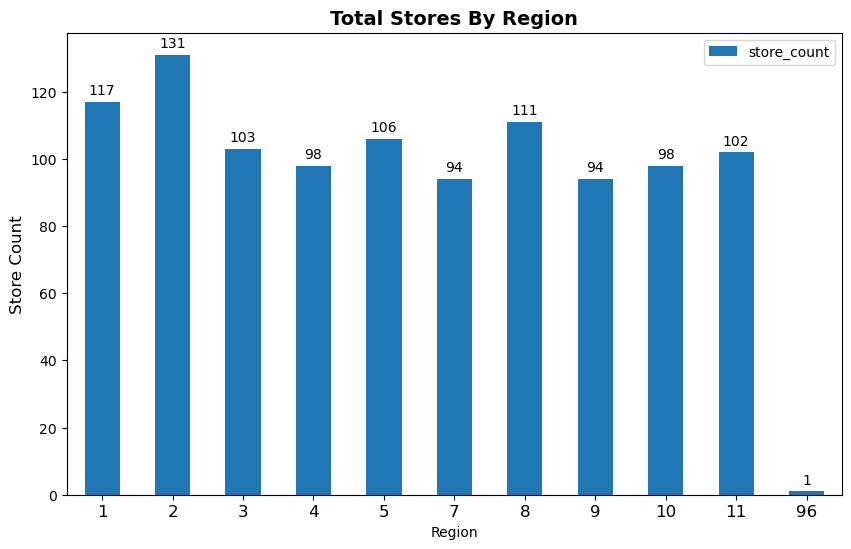

In [67]:
reg_store_counts['region'] = reg_store_counts['region'].astype(str)

ax = reg_store_counts.plot(kind='bar', x='region', y='store_count', figsize=(10,6))
ax.set_xticklabels(reg_store_counts['region'], rotation=0, fontsize=12)
ax.set_ylabel('Store Count', fontsize=12)
ax.set_xlabel('Region')
ax.set_title('Total Stores By Region', fontsize=14, fontweight='bold')


# Add counts to the top of each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10, padding=3);

In [68]:
#to pull total number of regions
num_regions = len(reg_store_counts)
num_regions

11

In [69]:
#create dataframe and reset index
dist_store_counts = stores['DISTRICT'].value_counts().to_frame().reset_index()
#rename columns
dist_store_counts.rename(columns={'index': 'district', 'DISTRICT': 'store_count'}, inplace=True)
#sort by district
dist_store_counts.sort_values(by = 'district', inplace=True)

dist_store_counts

,district,store_count
13,1,18
23,2,17
48,3,15
60,4,13
43,5,15
7,6,18
33,7,16
57,8,13
5,9,18
35,10,15


In [70]:
dist_store_counts.to_csv('dist_store_counts.csv', index=False)
FileLink('dist_store_counts.csv')

C:\Users\houxu\Documents\DDA9\Python\projects\genesco_project-bulldogs\notebooks\dist_store_counts.csv

In [71]:
dist_store_counts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 13 to 67
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   district     68 non-null     int64
 1   store_count  68 non-null     int64
dtypes: int64(2)
memory usage: 1.6 KB


#### District code 
Q. Should the district code be a string and not an int, treated as a dimension and not a measure, as we will not be calcuating on it?

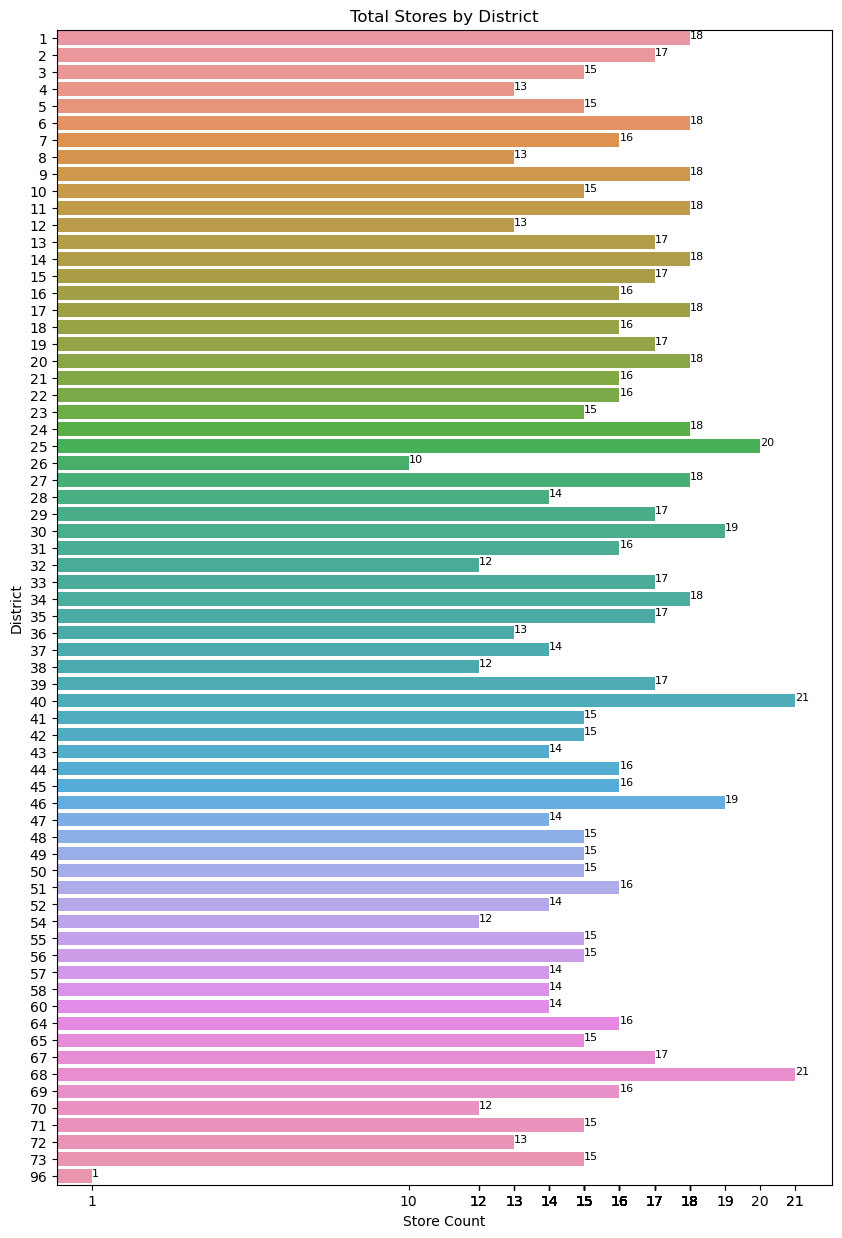

In [12]:
dist_store_counts['district'] = dist_store_counts['district'].astype(str)

# create the horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 15))
sns.barplot(x='store_count', y='district', data=dist_store_counts, ax=ax)

# set the x-label to 'Store Count'
ax.set_xlabel('Store Count')

# set the y-label to 'District'
ax.set_ylabel('District')

# add individual store count labels at the end of each bar
for i, v in enumerate(dist_store_counts['store_count']):
    ax.text(v, i, str(v), color='black', fontsize=8)

# set the x-ticks to the individual store counts
ax.set_xticks(dist_store_counts['store_count'])

plt.title('Total Stores by District');

In [13]:
#to pull total number of districts
num_districts = len(dist_store_counts)
num_districts

68

In [14]:
stores.nunique()

DIV                     1
STORE                1055
DIV_ORG                 4
DIV_ORG_NAME            4
REGION                 11
DISTRICT               68
STORE_NAME           1055
STORE_CITY            640
STORE_STATE_ALPHA      51
STORE_ZIP             943
GROSS_FEET            745
MALL_GRADE             14
LOCATION_GRADE          4
MALL_NAME             882
LATITUDE              769
LONGITUDE             768
dtype: int64

In [15]:
# create the DataFrame using value_counts().to_frame().reset_index()
unique_div_org_names = stores['DIV_ORG_NAME'].value_counts().to_frame().reset_index()

# rename the columns to 'div_org_name' and 'count'
div_org_count = unique_div_org_names.rename(columns={'index': 'Organization', 'DIV_ORG_NAME': 'Total Stores'})

div_org_count

,Organization,Total Stores
0,JY,759
1,JYK,233
2,JYUG,61
3,SHI,2


In [73]:
div_org_count.to_csv('div_org_counts.csv', index=False)
FileLink('div_org_counts.csv')

C:\Users\houxu\Documents\DDA9\Python\projects\genesco_project-bulldogs\notebooks\div_org_counts.csv

#### Need to make a legend for below with what abbreviations stand for

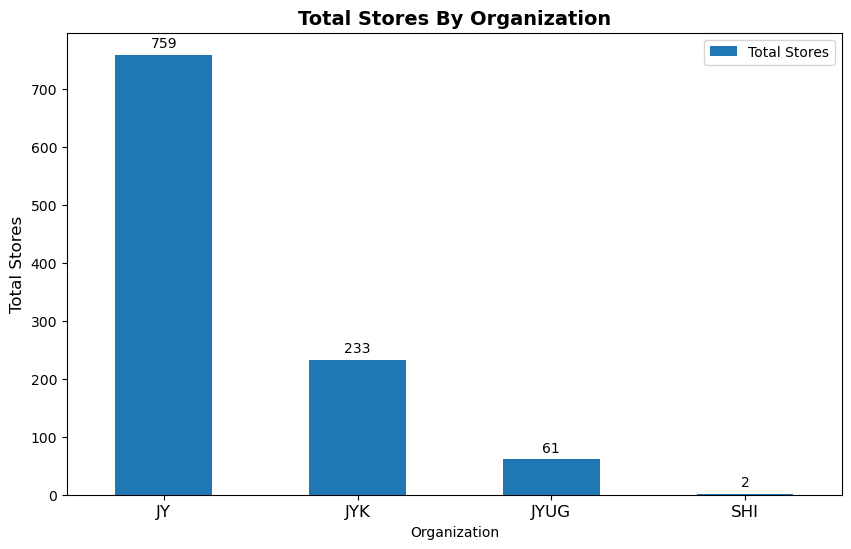

In [16]:
ax = div_org_count.plot(kind='bar', x='Organization', y='Total Stores', figsize=(10,6))
ax.set_xticklabels(div_org_count['Organization'], rotation=0, fontsize=12)
ax.set_ylabel('Total Stores', fontsize=12)
ax.set_xlabel('Organization')
ax.set_title('Total Stores By Organization', fontsize=14, fontweight='bold')


# Add counts to the top of each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10, padding=3);

In [17]:
stores.isna().sum()

DIV                  0
STORE                0
DIV_ORG              0
DIV_ORG_NAME         0
REGION               0
DISTRICT             0
STORE_NAME           0
STORE_CITY           0
STORE_STATE_ALPHA    0
STORE_ZIP            0
GROSS_FEET           1
MALL_GRADE           1
LOCATION_GRADE       1
MALL_NAME            1
LATITUDE             0
LONGITUDE            0
dtype: int64

In [18]:
products = pd.read_csv('../data/products.csv')

#### products has 29111 rows, 13 columns

In [19]:
products.head(3)

,DIV,STOCKNO,STYLE_DESCR,BRAND_ID,VENDOR_NUMBER,VENDOR_NAME,COMBINED_BRAND,DEPARTMENT,DEPARTMENT_NAME,MAJOR,MAJOR_NAME,MINOR,MINOR_NAME
0,8,107,HASH,NaN,77311,UNI HOSIERY CO,UNI HOSIERY CO,5,05 - HOSE,80,80 - Hose,8301,8301 - Womens Casuals
1,8,112,HASH,NaN,379400,HUFFMAN FINISHING CO,HUFFMAN FINISHING CO,5,05 - HOSE,80,80 - Hose,8401,8401 - Womens Athletics
2,8,129,DKGREY LOW CUT 5PK,VANS,379400,HUFFMAN FINISHING CO,VANS,5,05 - HOSE,80,80 - Hose,9999,9999 - Web


In [34]:
products['STOCKNO'].describe()

count    2.911100e+04
mean     2.265042e+07
std      3.836512e+07
min      1.070000e+02
25%      3.521945e+05
50%      1.100706e+06
75%      1.579124e+07
max      9.994107e+07
Name: STOCKNO, dtype: float64

In [35]:
products['STOCKNO'].min()

107

In [36]:
products['STOCKNO'].max()

99941068

In [20]:
products.shape[1]

13

In [21]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29111 entries, 0 to 29110
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DIV              29111 non-null  int64 
 1   STOCKNO          29111 non-null  int64 
 2   STYLE_DESCR      29095 non-null  object
 3   BRAND_ID         16898 non-null  object
 4   VENDOR_NUMBER    29111 non-null  int64 
 5   VENDOR_NAME      29111 non-null  object
 6   COMBINED_BRAND   29111 non-null  object
 7   DEPARTMENT       29111 non-null  int64 
 8   DEPARTMENT_NAME  29111 non-null  object
 9   MAJOR            29111 non-null  int64 
 10  MAJOR_NAME       29111 non-null  object
 11  MINOR            29111 non-null  int64 
 12  MINOR_NAME       29111 non-null  object
dtypes: int64(6), object(7)
memory usage: 2.9+ MB


In [22]:
products.describe()

,DIV,STOCKNO,VENDOR_NUMBER,DEPARTMENT,MAJOR,MINOR
count,29111.0,2.911100e+04,29111.000000,29111.000000,29111.000000,29111.000000
mean,8.0,2.265042e+07,182799.832434,4.057848,56.285597,7471.504655
std,0.0,3.836512e+07,287546.414143,2.640647,24.402310,2913.881905
min,8.0,1.070000e+02,578.000000,1.000000,11.000000,301.000000
25%,8.0,3.521945e+05,1493.000000,2.000000,40.000000,5035.000000
50%,8.0,1.100706e+06,80790.000000,3.000000,60.000000,9106.000000
75%,8.0,1.579124e+07,134634.000000,6.000000,70.000000,9940.000000
max,8.0,9.994107e+07,960265.000000,15.000000,95.000000,9999.000000


In [23]:
products.isna().sum()

DIV                    0
STOCKNO                0
STYLE_DESCR           16
BRAND_ID           12213
VENDOR_NUMBER          0
VENDOR_NAME            0
COMBINED_BRAND         0
DEPARTMENT             0
DEPARTMENT_NAME        0
MAJOR                  0
MAJOR_NAME             0
MINOR                  0
MINOR_NAME             0
dtype: int64

In [24]:
#create dataframe and reset index
product_counts_by_dept = products['DEPARTMENT'].value_counts().to_frame().reset_index()
#rename columns
product_counts_by_dept.rename(columns={'index': 'Department', 'DEPARTMENT': 'Total_Products'}, inplace=True)
#sort by district
product_counts_by_dept.sort_values(by = 'Total_Products', ascending=False, inplace=True)

product_counts_by_dept

,Department,Total_Products
0,3,8538
1,1,6051
2,4,2777
3,7,2482
4,8,2427
5,2,2092
6,6,1806
7,5,1033
8,10,1019
9,9,850


In [57]:
major_counts = products['MAJOR_NAME'].value_counts()
major_counts

60 - Wom Fashion         5745
90 - Accessories         3635
40 - Mens Ath            3238
20 - Mens Fashion        2813
70 - Wom Ath             2793
11 - Ath Boys 11-7       1534
45 - Athletic Girls      1532
91 - Kidz Accessories    1481
65 - Toddler Casuals     1326
30 - Girls Fashion       1228
55 - Toddler Athl        1156
80 - Hose                1033
81 - Kidz Hose            850
21 - Cas Boys 11-7        575
85 - Findings             171
95 - Non Marginal           1
Name: MAJOR_NAME, dtype: int64

In [61]:
minor_counts = products['MINOR_NAME'].value_counts()
pd.set_option('display.max_rows', None)
print(minor_counts)

9960 - Direct Wom Fashion      3271
9940 - Direct Mens Ath         1553
9920 - Direct Mens Fashion     1282
9970 - Direct Wom Ath          1033
9202 - Guys Apparel             720
9201 - Girls Apparel            624
9911 - Direct Boys Ath          579
9805 - Backpacks                557
9990 - Direct Accessories       507
9930 - Direct Girls Fashion     497
9999 - Web                      483
8105 - KIDZ Web                 480
9965 - Direct Todd Casuals      419
6671 - Uggs                     392
7703 - Chucks Novelty           378
9945 - Direct Girls Ath         373
9806 - Other Packs              371
4604 - Vans                     353
4608 - Adidas                   319
5005 - Vans Toddler             296
7671 - Vans                     294
9402 - Hats                     276
4002 - Converse Girls 11-7      266
9955 - Direct Todd Athletic     260
7602 - Adidas                   253
9991 - KIDZ Direct Kdz Acc      237
6204 - Doc Martens              220
1105 - Adidas Boys 11-7     

In [63]:
department_counts = products['DEPARTMENT_NAME'].value_counts()
pd.set_option('display.max_rows', None)
print(department_counts)

03 - WOMENS                  8538
01 - MENS                    6051
04 - GIRLS                   2777
07 - TODDLERS                2482
08 - FINDINGS-ACCESSORIES    2427
02 - BOYS                    2092
06 - APPAREL                 1806
05 - HOSE                    1033
10 - KIDZ ACCESSORIES        1019
09 - KIDZ HOSE                850
15 - SHOE_CARE                 36
Name: DEPARTMENT_NAME, dtype: int64


In [42]:
store_sales = pd.read_csv('../data/store_sales.csv')

#### Store sales has 707903 rows, 4 columns
NOTE: stockno

In [43]:
store_sales

,DIV,STORE,STOCKNO,COUNT(*)
0,8,11,131732,2
1,8,11,131733,6
2,8,11,131738,2
3,8,11,132024,1
4,8,11,132025,2
...,...,...,...,...
707899,8,7217,99802230,3
707900,8,7217,99802241,3
707901,8,7217,99802404,1
707902,8,7217,99802406,4


In [44]:
store_sales.shape[1]

4

In [45]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707904 entries, 0 to 707903
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   DIV       707904 non-null  int64
 1   STORE     707904 non-null  int64
 2   STOCKNO   707904 non-null  int64
 3   COUNT(*)  707904 non-null  int64
dtypes: int64(4)
memory usage: 21.6 MB


In [46]:
store_sales.describe()

,DIV,STORE,STOCKNO,COUNT(*)
count,707904.0,707904.000000,7.079040e+05,707904.000000
mean,8.0,1827.868414,1.538351e+07,9.201040
std,0.0,2138.992732,3.501208e+07,58.979682
min,8.0,11.000000,1.100360e+05,1.000000
25%,8.0,742.000000,4.976340e+05,2.000000
50%,8.0,1131.000000,5.821220e+05,4.000000
75%,8.0,1602.000000,1.498252e+06,8.000000
max,8.0,7217.000000,9.992500e+07,19131.000000


In [48]:
store_sales['STOCKNO'].min()

110036

In [49]:
store_sales['STOCKNO'].max()

99925002

In [50]:
store_sales['COUNT(*)'].min()

1

In [51]:
store_sales['COUNT(*)'].max()

19131

In [39]:
sold_with = pd.read_csv('../data/sold_with.csv')

C:\Users\houxu\AppData\Local\Temp\ipykernel_22336\3198791842.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  sold_with = pd.read_csv('../data/sold_with.csv')


In [40]:
sold_with.head(3)

,div,store,transaction_date,primary_stockno,primary_item_size,primary_item_width,primary_emp_ind,primary_sos_ind,primary_units,secondary_stockno,secondary_item_size,secondary_item_width,secondary_emp_ind,secondary_sos_ind,secondary_units,primary_lineno,secondary_lineno
0,8,520,2022-11-18,581637,080,M,N,N,1,398913,060,M,N,N,1,2,1
1,8,520,2022-11-19,895945,090,M,N,N,1,3892,NaN,NaN,N,N,1,1,2
2,8,520,2022-11-19,398329,050,M,N,N,1,29009,NaN,NaN,N,N,1,2,1


In [64]:
sold_with.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107868 entries, 0 to 3107867
Data columns (total 17 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   div                   int64 
 1   store                 int64 
 2   transaction_date      object
 3   primary_stockno       int64 
 4   primary_item_size     object
 5   primary_item_width    object
 6   primary_emp_ind       object
 7   primary_sos_ind       object
 8   primary_units         int64 
 9   secondary_stockno     int64 
 10  secondary_item_size   object
 11  secondary_item_width  object
 12  secondary_emp_ind     object
 13  secondary_sos_ind     object
 14  secondary_units       int64 
 15  primary_lineno        int64 
 16  secondary_lineno      int64 
dtypes: int64(8), object(9)
memory usage: 403.1+ MB
